# Project: The Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Movie dataset is a dataset containing 10866 data with 21 characteristics of each data including
> 1. Original title: Title of the movie
> 2. Popularity
> 3. Budget: Movie spent on movie
> 4. Revenue: Movie generated from movie
> 5. Runtime: Minutes movie runs
> 6. Genre: Movie type description
> 7. Release year: Year the movie is released
> 8. Vote count
> 9. Vote average and so on.


### Question(s) for Analysis
> 1. Is the most popular movie each year the highest gross movie each year?
> 2. What is the coorelation between the highest gross movie and the maximum ratings of the genres?


In [1]:
#importing packages to analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will be loading, assessing and cleaning the dataset.

In [2]:
# Load data and print out a few lines.
df_tmdb=pd.read_csv('tmdb-movies.csv')
df_tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#printing the last few lines of the dataset
df_tmdb.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#returns the dimension of the dataframe
df_tmdb.shape

(10866, 21)

In [5]:
#returns a summary of the dataframe, including the number of non-null values
# and datatype of each column.
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#returns the number of unique values in each columns.
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#sum of the duplicated rows
sum(df_tmdb.duplicated())

1


## Data Cleaning
> From the information gotten from the loaded information
> 1. Some of the columns will be dropped, for they are not relevant to the questions/analysis.
> 2. Drop duplicates
> 3. Replace all value 0 to NaN
> 4. Rows with null data will be dropped or replaced with values if numerical.
> 5. We will be splitting columns and keeping keeping relevant data.
> 6. We will be creating new columns from existing columns.

 

In [8]:
#dropping columns not relevant in our analysis
df_movies = df_tmdb.drop(['id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 
                 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'],
                  axis =1, inplace=False)

In [9]:
#dropping duplicates
df_movies=df_movies.drop_duplicates()

In [10]:
#Replacing all 0 values with NaN
df_movies=df_movies.replace(0, np.NaN)

In [11]:
#dropping all rows with an null values, because they are objects and cannot be filled with the means method
df_movies=df_movies.dropna(axis=0)

In [12]:
#splitting the genre column and dropping the columns with null values
#creating a list with the new column created
genre= np.array(df_movies['genres'].str.split('|', expand=True).dropna(axis=1))

In [13]:
#replacing the genre column in the Df_movie dataset with the new list genre
df_movies['genres']=genre

In [14]:
df_movies=df_movies.rename(columns={'vote_average':'ratings'}, inplace=False)

In [15]:
#viewing the new cleaned dataset
df_movies.head()

,imdb_id,popularity,budget,revenue,original_title,runtime,genres,vote_count,ratings,release_year
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action,5562,6.5,2015
1,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action,6185,7.1,2015
2,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure,2480,6.3,2015
3,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action,5292,7.5,2015
4,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action,2947,7.3,2015


In [16]:
#number of rows and columns
df_movies.shape

(3854, 10)

In [17]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         3854 non-null   object 
 1   popularity      3854 non-null   float64
 2   budget          3854 non-null   float64
 3   revenue         3854 non-null   float64
 4   original_title  3854 non-null   object 
 5   runtime         3854 non-null   float64
 6   genres          3854 non-null   object 
 7   vote_count      3854 non-null   int64  
 8   ratings         3854 non-null   float64
 9   release_year    3854 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 331.2+ KB


In [18]:
df_movies.isnull().sum()

imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
ratings           0
release_year      0
dtype: int64

In [19]:
sum(df_movies.duplicated())

0

> #### After assessing and cleaning the dataset, we  no longer have duplicate, null and irrelevant colums in our dataset. we will futher by exploring the analysis questions.

<a id='eda'></a>
## Exploratory Data Analysis

In [20]:
#creating sum of vote count per year
df_vote=df_movies.groupby('release_year')['vote_count'].sum()

<AxesSubplot:ylabel='Frequency'>

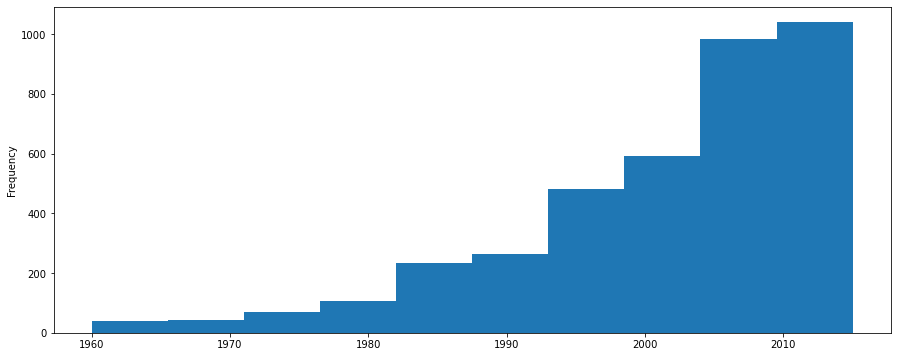

In [21]:
#plotting a histogarm frequency chart to show the distribution yearly
df_movies['release_year'].plot.hist(figsize=(15,6))

> ### The distribution is left skewed, has there are more values in the earlier years.

> ### 1. Is the most popular movie each year the highest gross movie each year?

In [22]:
#creating a column for the gross profit, using the formula: profit= revenue - budget
df_movies['gross_profit']=df_movies['revenue']- df_movies['budget']

In [23]:
#loading the dataset to check
df_movies.head()

,imdb_id,popularity,budget,revenue,original_title,runtime,genres,vote_count,ratings,release_year,gross_profit
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action,5562,6.5,2015,1.363529e+09
1,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action,6185,7.1,2015,2.284364e+08
2,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure,2480,6.3,2015,1.852382e+08
3,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action,5292,7.5,2015,1.868178e+09
4,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action,2947,7.3,2015,1.316249e+09


In [24]:
#creating a function for groupby and maximum
def df(group, maximum):
    df=DataFrame.groupby(group)[maximum].max()
    return df

In [25]:
#grouping by year to get the most popular movie each year
df=df_movies.groupby(['release_year'])[['popularity', 'original_title', 'genres']].max();

In [26]:
df.head()

,popularity,original_title,genres
release_year,,,
1960,2.610362,The Magnificent Seven,Drama
1961,2.631987,West Side Story,Western
1962,3.170651,To Kill a Mockingbird,Western
1963,2.508235,The Great Escape,Horror
1964,3.153791,The Night of the Iguana,Drama


In [27]:
#creating a list of the movies' popularity
popularity=df['popularity']

In [28]:
#grouping by year to get the most grossed movie each year
df=df_movies.groupby('release_year')[['gross_profit', 'original_title', 'genres', 'ratings']].max()

In [29]:
df.head()

,gross_profit,original_title,genres,ratings
release_year,,,,
1960,48000000.0,The Magnificent Seven,Drama,8.0
1961,211880014.0,West Side Story,Western,7.5
1962,58500000.0,To Kill a Mockingbird,Western,7.7
1963,76398765.0,The Great Escape,Horror,7.5
1964,121400000.0,The Night of the Iguana,Drama,7.7


> #### To determine if the list of popular movies is synonymous to the list of highest gross movie each year, I will be comparing by equating both dataset.
> #### If True, then the most popular movie is also the highest grossed movie that same year.
> #### If False, then it shows that being the most popular movie those not mean it is the highest gross movie for the year.

In [30]:
#checking for similarities
(df['original_title']==df['original_title']).all()

True

> #### Since the result is True, then it proves the latter.
> #### For futher analysis, I would be visualizing the two dataset in a subplot.

In [31]:
#creating a list of the movies' gross profit
gross_profit=df['gross_profit']

In [32]:
genres=df['genres']

In [33]:
#creating a list of the grouped years
year_array=np.array(df_movies['release_year'].unique())

In [34]:
#converting the array to list
year_list=year_array.tolist()

In [35]:
#sorting the list in ascending order
year=sorted(year_list)

In [36]:
print(year)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [37]:
#creating a dataframe for the max popularity and max profit of each year
df_PP=pd.DataFrame({'popularity': popularity, 'gross_profit': gross_profit}, index=year)

array([<AxesSubplot:title={'center':'Popularity'}, xlabel='Years', ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Gross Profit'}, xlabel='Years', ylabel='Frequency'>],
      dtype=object)

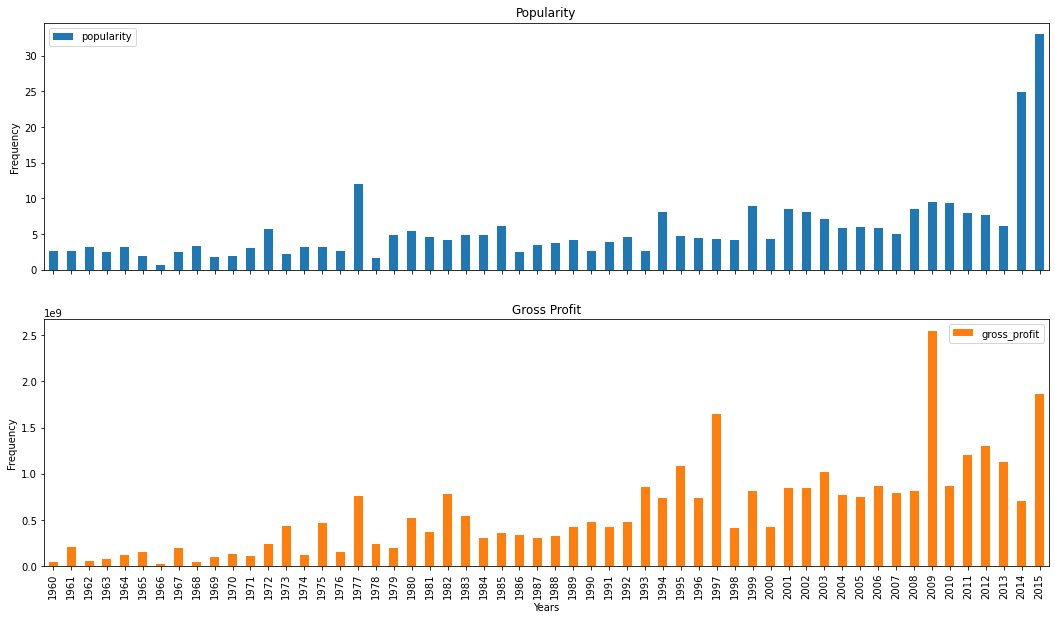

In [38]:
#plotting a bar subplot to view the table for mor inspection.
df_PP.plot.bar(rot=90, figsize=(18, 10), subplots=True, 
               title=['Popularity', 'Gross Profit'], 
               xlabel='Years',
               ylabel='Frequency'
              )

> ### The population and profit subplot is to visually compare if there is any coorelation between the most popular and highest gross movie each year and this shows that there is no coorelation between both variables. It futher shows a specific movie genre will not necessary yield the highest gross movie, this will be explore more in the next section.

### 2. What is the coorelation between the highest gross movie and the maximum ratings of the genres?

In [39]:
#creating a dataset of max gross profit and their ratings grouped by genres.
df_genres=df.groupby('genres')[['gross_profit', 'ratings']].max()

In [40]:
df_genres.head()

,gross_profit,ratings
genres,,
Drama,239066411.0,8.3
History,134200000.0,7.3
Horror,463654000.0,8.1
Music,201843612.0,7.6
Mystery,245218018.0,7.5


In [41]:
#creating a list of the gross profit
gross=df_genres['gross_profit']

In [42]:
#creating a list of the ratings
rating=df_genres['ratings']

In [43]:
#creating an array of the genre
genres_array=np.array(df_movies['genres'].unique())

In [44]:
genres=genres_array.tolist()

In [45]:
df_GR=pd.DataFrame({'gross_profit':gross, 'rating':rating}, index= genres)

array([<AxesSubplot:title={'center':'Gross Profit'}, xlabel='Genres', ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Ratings'}, xlabel='Genres', ylabel='Frequency'>],
      dtype=object)

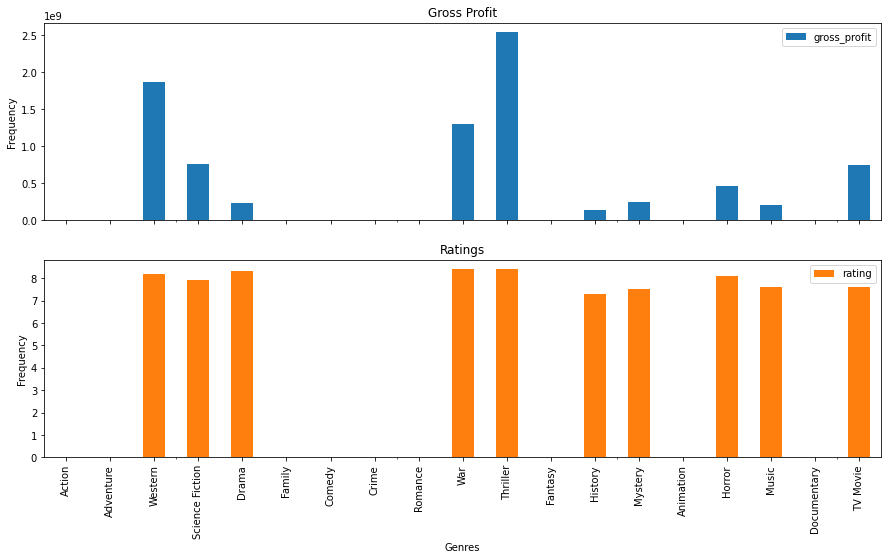

In [46]:
df_GR.plot.bar(rot=90, figsize=(15, 8), 
               subplots=True, 
               title=['Gross Profit', 'Ratings'], 
               xlabel= 'Genres',
               ylabel= 'Frequency'
            )

> ### This plot is created to visualize the difference or similarity of the gross and rating of the genres which shows that there is simalarities, for the highest grossed is also the highest rated. comparring other genre positions their seems to be a coorelation. To determine the coorelation type I will be using a scatter plot,  view below

In [47]:
#creating a table of the genres average popularity
avg_pop_genres=df_movies.groupby('genres')[['popularity']].mean()

<AxesSubplot:title={'center':'Popularity of Genres'}, xlabel='Genres', ylabel='Popularity'>

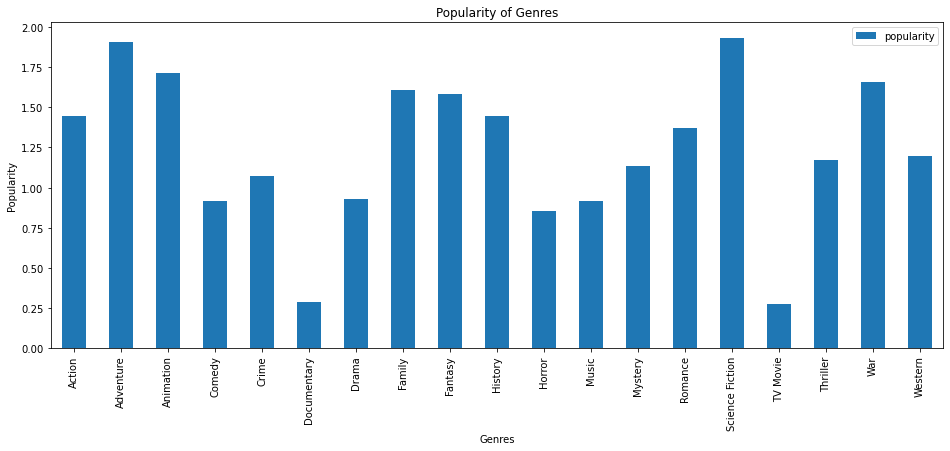

In [48]:
#ploting a bar chart to view the genres popularity
avg_pop_genres.plot.bar(figsize= (16, 6), title= 'Popularity of Genres', 
                        xlabel='Genres', 
                        ylabel='Popularity'
                       )

> ### This plot futher shows there is no coorelation between the popularity and profit of a genre.

<AxesSubplot:title={'center':'Profit & Ratings Coorelation'}, xlabel='Gross Profit', ylabel='Rating'>

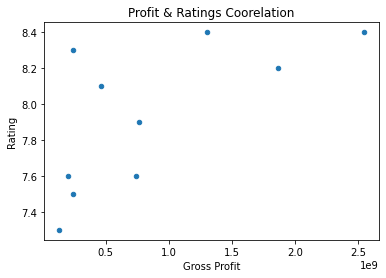

In [49]:
df_GR.plot.scatter(x= 'gross_profit', y='rating', 
                   title='Profit & Ratings Coorelation', 
                  xlabel= 'Gross Profit',
                  ylabel= 'Rating')

> ### In the scatter plot of the gross and rating, it shows a weak positive coorelation.

<a id='conclusions'></a>
## Conclusions

> From the first analysis, we are able to see that the being the most popular movie does not necessarily make it the highest gross movie and in futher analysis, the top gross movie was analysed with thier ratings with regards to their genres which shows a weak positive coorelation. We are able to conclude that the 3 top gross movie genre is Thrillar, war and western with them being among the top 10 popular and rated movies.

> Additional research can be done in research on why the drama genre which is one of the top rated genre but not top popular or gross movie.

> One of the limitation of the analysis is the genre in the dataset having multiple genre which was cleaned but might have a negative impact on the analysis conducted.